In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('yob2000.txt', index_col = 0, names = ['name', 'sex', 'freq'])

In [5]:
df.head(10).to_csv('first_10.csv') # writes first 10 lines of yob2000 to a new CSV file called first_10.csv

In [6]:
total_births = df['freq'].sum() # Calculate total births
total_births

3778079

In [7]:
df_sum_by_sex = df.groupby('sex')['freq'].sum()

In [8]:
df_sum_by_sex # calculates total births by sex

sex
F    1815110
M    1962969
Name: freq, dtype: int64

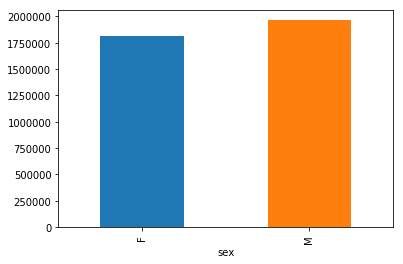

In [9]:
df_sum_by_sex.plot.bar() # plots boy and girl totals on a bar chart

In [10]:
df_unique = df.groupby(['name', 'sex'])[['freq']].sum()
# groups by name and sex, so that male and female instances of the same name are separate

In [11]:
df_unique.head(10)

,,freq
name,sex,
Aadam,M,6
Aadarsh,M,5
Aadil,M,9
Aaditya,M,11
Aahil,M,6
Aailyah,F,9
Aaisha,F,6
Aakash,M,28
Aakilah,F,7


In [12]:
# add column of percentages (using a function, in this case)

def get_perc(s):
    return s / total_births * 100

df_unique['percentage'] = df_unique['freq'].apply(get_perc)

In [13]:
df_unique['percentage'].sum() # verify that sum equals 100%

100.0

In [14]:
df_unique.sort_values(by = 'freq', ascending = False, inplace=True) # sort in descending order

In [15]:
df_unique.head(5)

,,freq,percentage
name,sex,,
Jacob,M,34471,0.912395
Michael,M,32035,0.847918
Matthew,M,28572,0.756257
Joshua,M,27538,0.728889
Emily,F,25953,0.686936


In [16]:
df_unique.iloc[:10]['percentage'].sum() # sum percentages of top 10 names

7.085505623360444

In [17]:
df_unique2 = df_unique.reset_index()
df_unique2.head(10)

,name,sex,freq,percentage
0,Jacob,M,34471,0.912395
1,Michael,M,32035,0.847918
2,Matthew,M,28572,0.756257
3,Joshua,M,27538,0.728889
4,Emily,F,25953,0.686936
5,Christopher,M,24931,0.659886
6,Nicholas,M,24652,0.652501
7,Andrew,M,23639,0.625688
8,Hannah,F,23080,0.610892
9,Joseph,M,22825,0.604143


In [18]:
df_unique2[df_unique2['name'] == 'David'] # extracts the lines with my name

,name,sex,freq,percentage
18,David,M,19767,0.523202
5378,David,F,44,0.001165


In [61]:
chosen_5 = ['David', 'Graham', 'Christopher', 'Gillian', 'Jean']

In [62]:
named_df = df_unique2.set_index('name')

In [63]:
my_named_df = named_df.loc[chosen_5]
my_named_df

,sex,freq,percentage
name,,,
David,M,19767,0.523202
David,F,44,0.001165
Graham,M,618,0.016358
Christopher,M,24931,0.659886
Christopher,F,50,0.001323
Gillian,F,976,0.025833
Gillian,M,6,0.000159
Jean,M,291,0.007702
Jean,F,118,0.003123


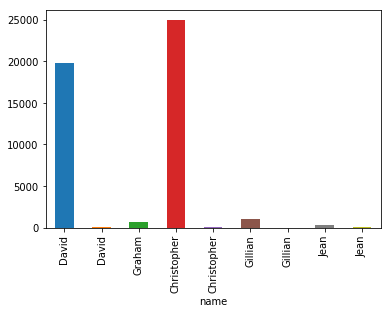

In [64]:
my_named_df['freq'].plot.bar()

In [23]:
years = range(1880, 2018)
data = []

for y in years:
    fn = f'yob{y}.txt'        # fn = 'yob{}.txt'.format(y)
    df = pd.read_csv(fn, names = ['sex', 'freq'])
    df['year'] = y
    data.append(df)

df = pd.concat(data)

In [24]:
davids = df.loc[['David']]
davids.head(10)

,sex,freq,year
David,M,869,1880
David,M,750,1881
David,M,838,1882
David,F,6,1883
David,M,734,1883
David,M,761,1884
David,F,5,1885
David,M,712,1885
David,M,674,1886
David,F,9,1887


In [25]:
mdavids = davids[davids['sex'] == 'M'].set_index('year')
mdavids.head(10)

,sex,freq
year,,
1880,M,869
1881,M,750
1882,M,838
1883,M,734
1884,M,761
1885,M,712
1886,M,674
1887,M,673
1888,M,801


### And now the plot:

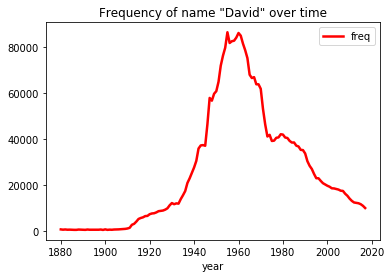

In [26]:
mdavids.plot(color = 'r', linewidth = 2.5)
plt.title('Frequency of name "David" over time')
plt.savefig('david_over_time.png', dpi = 600)

### Celebrity names:

In [27]:
madonnas = df.loc[['Madonna']].set_index('year')

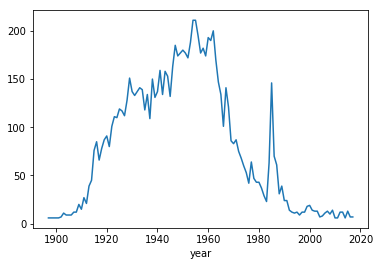

In [28]:
madonnas['freq'].plot()

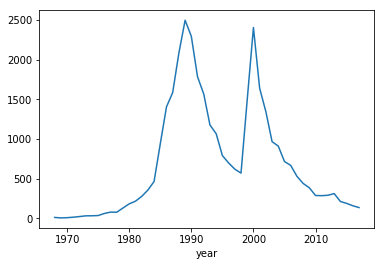

In [29]:
britneys = df.loc[['Britney']].set_index('year')
fbritneys = britneys[britneys['sex'] == 'F']
fbritneys['freq'].plot()

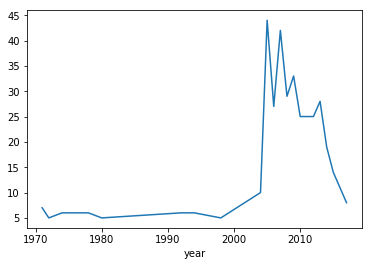

In [30]:
apples = df.loc[['Apple']].set_index('year')
fapples = apples[apples['sex'] == 'F']
fapples['freq'].plot()

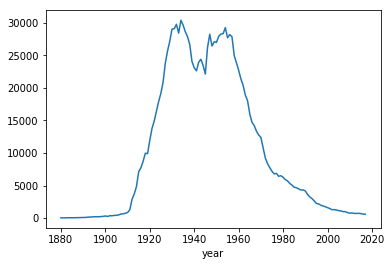

In [31]:
donalds = df.loc[['Donald']].set_index('year')
mdonalds = donalds[donalds['sex'] == 'M']
mdonalds['freq'].plot()

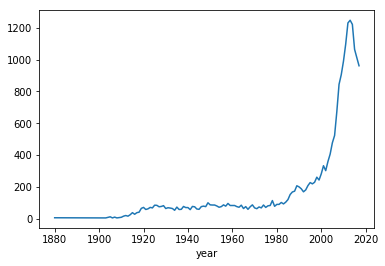

In [32]:
cruzes = df.loc[['Cruz']].set_index('year')
mcruzes = cruzes[cruzes['sex'] == 'M']
mcruzes['freq'].plot()

### Total US birthrates over time:

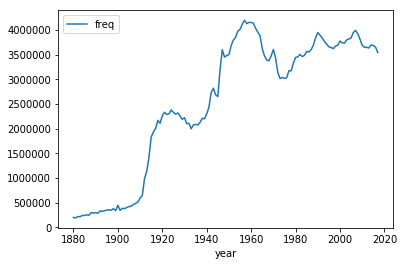

In [33]:
df.groupby('year')[['freq']].sum().plot()

In [34]:
### Separated by boys and girls:

In [35]:
df_mf = df.groupby(['year', 'sex']).sum()
df_mf.head()

freq
year sex        
1880 F     90993
     M    110491
1881 F     91953
     M    100743
1882 F    107847

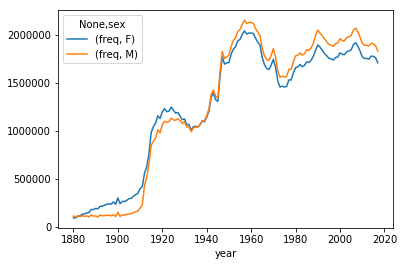

In [36]:
df_mf.unstack(1).plot()

### To normalize:

In [37]:
births_per_year = df.groupby('year')[['freq']].sum()

In [38]:
births_per_year.reset_index(inplace=True)
births_per_year.head(10)

,year,freq
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462
5,1885,240854
6,1886,255317
7,1887,247394
8,1888,299473
9,1889,288946


In [39]:
dfr = df.reset_index()

In [40]:
df_merged = pd.merge(dfr, births_per_year, on = 'year', how = 'left')

In [41]:
df_merged['relfreq'] = df_merged['freq_x'] / df_merged['freq_y']
df_merged.head(10)

,index,sex,freq_x,year,freq_y,relfreq
0,Mary,F,7065,1880,201484,0.035065
1,Anna,F,2604,1880,201484,0.012924
2,Emma,F,2003,1880,201484,0.009941
3,Elizabeth,F,1939,1880,201484,0.009624
4,Minnie,F,1746,1880,201484,0.008666
5,Margaret,F,1578,1880,201484,0.007832
6,Ida,F,1472,1880,201484,0.007306
7,Alice,F,1414,1880,201484,0.007018
8,Bertha,F,1320,1880,201484,0.006551
9,Sarah,F,1288,1880,201484,0.006393


### To plot relative frequencies, must rearrange this df accordingly:

In [42]:
df_merged2 = df_merged.set_index('index')
df_merged2.head()

,sex,freq_x,year,freq_y,relfreq
index,,,,,
Mary,F,7065,1880,201484,0.035065
Anna,F,2604,1880,201484,0.012924
Emma,F,2003,1880,201484,0.009941
Elizabeth,F,1939,1880,201484,0.009624
Minnie,F,1746,1880,201484,0.008666


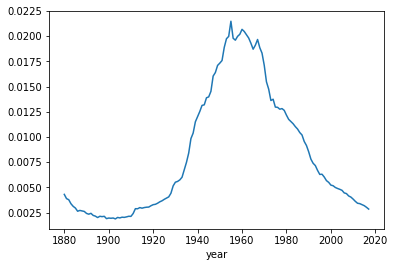

In [43]:
davids = df_merged2.loc['David'].set_index('year')
mdavids = davids[davids['sex'] == 'M']
mdavids['relfreq'].plot()

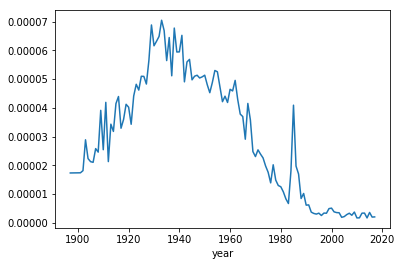

In [44]:
madonnas = df_merged2.loc['Madonna'].set_index('year')
fmadonnas = madonnas[madonnas['sex'] == 'F']
fmadonnas['relfreq'].plot()

Baby names **have** become more diverse over time (but not since ~2005!):

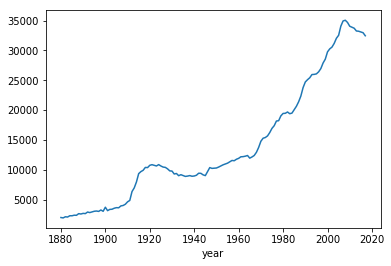

In [45]:
df.groupby('year')['freq'].count().plot()

Assumptions???

In [46]:
def get_length(n):
    return len(n)

df_merged['length'] = df_merged['index'].apply(get_length)
df_merged.head(10)

,index,sex,freq_x,year,freq_y,relfreq,length
0,Mary,F,7065,1880,201484,0.035065,4
1,Anna,F,2604,1880,201484,0.012924,4
2,Emma,F,2003,1880,201484,0.009941,4
3,Elizabeth,F,1939,1880,201484,0.009624,9
4,Minnie,F,1746,1880,201484,0.008666,6
5,Margaret,F,1578,1880,201484,0.007832,8
6,Ida,F,1472,1880,201484,0.007306,3
7,Alice,F,1414,1880,201484,0.007018,5
8,Bertha,F,1320,1880,201484,0.006551,6
9,Sarah,F,1288,1880,201484,0.006393,5


In [47]:
df_merged['name'] = df_merged['index']

In [48]:
del df_merged['index']

In [49]:
df_merged.head()

,sex,freq_x,year,freq_y,relfreq,length,name
0,F,7065,1880,201484,0.035065,4,Mary
1,F,2604,1880,201484,0.012924,4,Anna
2,F,2003,1880,201484,0.009941,4,Emma
3,F,1939,1880,201484,0.009624,9,Elizabeth
4,F,1746,1880,201484,0.008666,6,Minnie


In [50]:
df_merged.sort_values(by = 'length', ascending = False).head(10)

,sex,freq_x,year,freq_y,relfreq,length,name
1273784,M,6,1997,3624799,0.000002,15,Christopherjame
1485009,M,5,2004,3818361,0.000001,15,Christianmichae
1011480,F,7,1987,3604403,0.000002,15,Mariadelosangel
1331306,M,5,1999,3692537,0.000001,15,Christianjoseph
1033393,F,7,1988,3693471,0.000002,15,Mariadelosangel
939066,M,8,1983,3462826,0.000002,15,Christopherjohn
1422999,M,5,2002,3736042,0.000001,15,Ryanchristopher
1824466,M,5,2014,3696311,0.000001,15,Christopherjohn
1143663,M,5,1992,3840196,0.000001,15,Christopherjohn
1485010,M,5,2004,3818361,0.000001,15,Christopherdavi


### To establish number of distinct names beginning with 'A', must first group by name:

In [51]:
df_by_name = df_merged.groupby(['name', 'sex'])[['freq_x']].sum()

In [52]:
df_by_name.reset_index(inplace = True)

### Then add initial column:

In [53]:
def get_initial(n):
    return n[0]

df_by_name['initial'] = df_by_name['name'].apply(get_initial)

In [54]:
df_by_name.head(10)

,name,sex,freq_x,initial
0,Aaban,M,107,A
1,Aabha,F,35,A
2,Aabid,M,10,A
3,Aabir,M,5,A
4,Aabriella,F,32,A
5,Aada,F,5,A
6,Aadam,M,254,A
7,Aadan,M,130,A
8,Aadarsh,M,199,A
9,Aaden,F,5,A


In [55]:
df_by_name[df_by_name['initial'] == 'A']['name'].count()

11286

There are 11,286 distinct names beginning with 'A' (counting male and female instances of the same name separately).

Now to plot the relative frequency of initials over time... We go back and add the initial column to df_merged:

In [56]:
df_merged['initial'] = df_merged['name'].apply(get_initial)
df_merged.head(10)

,sex,freq_x,year,freq_y,relfreq,length,name,initial
0,F,7065,1880,201484,0.035065,4,Mary,M
1,F,2604,1880,201484,0.012924,4,Anna,A
2,F,2003,1880,201484,0.009941,4,Emma,E
3,F,1939,1880,201484,0.009624,9,Elizabeth,E
4,F,1746,1880,201484,0.008666,6,Minnie,M
5,F,1578,1880,201484,0.007832,8,Margaret,M
6,F,1472,1880,201484,0.007306,3,Ida,I
7,F,1414,1880,201484,0.007018,5,Alice,A
8,F,1320,1880,201484,0.006551,6,Bertha,B
9,F,1288,1880,201484,0.006393,5,Sarah,S


In [57]:
df_merged3 = df_merged.groupby(['year', 'initial'])[['relfreq']].sum()
df_merged3.head(10)

relfreq
year initial          
1880 A        0.083084
     B        0.029734
     C        0.078503
     D        0.023357
     E        0.091015
     F        0.047081
     G        0.043363
     H        0.051329
     I        0.017009
     J        0.129400

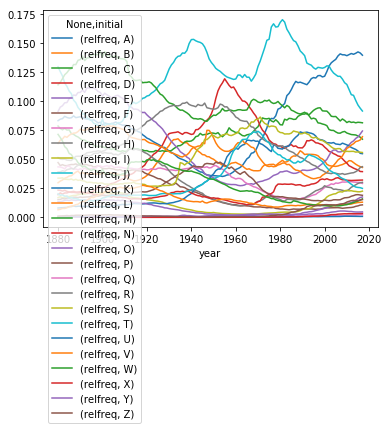

In [58]:
df_merged3.unstack(1).plot()

In [59]:
df_merged3['relfreq'].sum()

138.0

To add the last letter column:

In [60]:
def get_last_letter(n):
    return n[-1]

